In [21]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype

In [22]:
# Experiment 1 df
pi2_exp1_df = pd.read_excel("CNFUV_Datasets/Datasets/Data_Experiment_1/pi2.xlsx")
pi3_exp1_df = pd.read_excel("CNFUV_Datasets/Datasets/Data_Experiment_1/pi3.xlsx")
pi4_exp1_df = pd.read_excel("CNFUV_Datasets/Datasets/Data_Experiment_1/pi4.xlsx")
pi5_exp1_df = pd.read_excel("CNFUV_Datasets/Datasets/Data_Experiment_1/pi5.xlsx")

In [23]:
# Experiment 2 df
pi2_exp2_df = pd.read_excel("CNFUV_Datasets/Datasets/Data_Experiment_2/pi2.xlsx")
pi3_exp2_df = pd.read_excel("CNFUV_Datasets/Datasets/Data_Experiment_2/pi3.xlsx")
pi4_exp2_df = pd.read_excel("CNFUV_Datasets/Datasets/Data_Experiment_2/pi4.xlsx")
pi5_exp2_df = pd.read_excel("CNFUV_Datasets/Datasets/Data_Experiment_2/pi5.xlsx")

In [24]:
all_data = [
    pi2_exp1_df, pi3_exp1_df, pi4_exp1_df, pi5_exp1_df,
    pi2_exp2_df, pi3_exp2_df, pi4_exp2_df, pi5_exp2_df
]

In [25]:
# Head of datasets
for idx, df in enumerate(all_data):
    exp = 2 if idx > 3 else 1
    print("\n\n\n**PI_{}_EXPERIMENT_{}**".format((idx%4)+2, exp))
    print(df.head(2))




**PI_2_EXPERIMENT_1**
                                Device Humidity Temperature  Experiment  \
0   'gnfuv-temp-exp1-55d487b85b-5g2xh'       21          40           1   
1   'gnfuv-temp-exp1-55d487b85b-5g2xh'       21          40           1   

                            time   Pi  
0  2018-03-26 17:19:17.406089000  pi2  
1  2018-03-26 17:19:31.261505000  pi2  



**PI_3_EXPERIMENT_1**
                                Device  Humidity  Temperature  Experiment  \
0   'gnfuv-temp-exp1-55d487b85b-2bl8b'        43           27           1   
1   'gnfuv-temp-exp1-55d487b85b-2bl8b'        39           31           1   

                            time   Pi  
0  2018-03-26 17:13:52.221747000  pi3  
1  2018-03-26 17:13:57.033001000  pi3  



**PI_4_EXPERIMENT_1**
                                Device Humidity Temperature  Experiment  \
0   'gnfuv-temp-exp1-55d487b85b-2msrd'        0          18           1   
1   'gnfuv-temp-exp1-55d487b85b-2msrd'       64          19           1   

 

In [26]:
# Check if data is clean
for idx, df in enumerate(all_data):
    exp = 2 if idx > 3 else 1
    print("\n\n\n**PI_{}_EXPERIMENT_{}**".format((idx%4)+2, exp))
    for feat in df.select_dtypes(exclude="number"):
        print("-----------------")
        print("{}\n".format(feat))
        print("{}\n".format(df[feat].value_counts()))





**PI_2_EXPERIMENT_1**
-----------------
Device

 'gnfuv-temp-exp1-55d487b85b-5g2xh'    342
 'gnfuv-temp-exp1-55d487b85b-mjlpx'    338
 'gnfuv-temp-exp1-55d487b85b-nzmqm'    294
 'gnfuv-temp-exp1-55d487b85b-vhrp5'    212
 'gnfuv-temp-exp1-55d487b85b-j2pn2'    199
 'gnfuv-temp-exp1-55d487b85b-7k5px'     95
 'gnfuv-temp-exp1-55d487b85b-6zfgq'     27
 'gnfuv-temp-exp1-55d487b85b-7kxwx'     20
 'gnfuv-temp-exp1-55d487b85b-9jxjf'     19
Name: Device, dtype: int64

-----------------
Humidity

20       219
19       171
21       132
18       118
44        82
29        77
16        72
28        69
42        53
17        37
30        37
27        34
26        31
25        27
43        26
24        25
23        23
22        22
38        21
54        20
49        18
34        18
35        17
15        17
48        15
53        14
 None     14
36        13
57        13
50        12
41        11
46        10
37        10
47         9
33         9
51         8
39         8
52         7
32         6

In [27]:
# Drop None rows from uncleaned data
for idx, df in enumerate(all_data):
    all_data[idx] = df.mask(df.eq(' None')).dropna()

In [28]:
# Check if data is clean
for idx, df in enumerate(all_data):
    exp = 2 if idx > 3 else 1
    print("\n\n\n**PI_{}_EXPERIMENT_{}**".format((idx%4)+2, exp))
    for feat in df.select_dtypes(exclude="number"):
        print("-----------------")
        print("{}\n".format(feat))
        print("{}\n".format(df[feat].value_counts()))




**PI_2_EXPERIMENT_1**
-----------------
Device

 'gnfuv-temp-exp1-55d487b85b-5g2xh'    342
 'gnfuv-temp-exp1-55d487b85b-mjlpx'    338
 'gnfuv-temp-exp1-55d487b85b-nzmqm'    294
 'gnfuv-temp-exp1-55d487b85b-vhrp5'    210
 'gnfuv-temp-exp1-55d487b85b-j2pn2'    193
 'gnfuv-temp-exp1-55d487b85b-7k5px'     95
 'gnfuv-temp-exp1-55d487b85b-6zfgq'     27
 'gnfuv-temp-exp1-55d487b85b-7kxwx'     18
 'gnfuv-temp-exp1-55d487b85b-9jxjf'     15
Name: Device, dtype: int64

-----------------
Humidity

20    219
19    171
21    132
18    118
44     82
29     77
16     72
28     69
42     53
17     37
30     37
27     34
26     31
25     27
43     26
24     25
23     23
22     22
38     21
54     20
49     18
34     18
35     17
15     17
48     15
53     14
36     13
57     13
50     12
41     11
46     10
37     10
47      9
33      9
39      8
51      8
52      7
32      6
45      5
55      5
31      4
56      4
40      3
Name: Humidity, dtype: int64

-----------------
Temperature

40    326
41   

In [29]:
# No missing Value
for idx, df in enumerate(all_data):
    exp = 2 if idx > 3 else 1
    print("\n\n\n**PI_{}_EXPERIMENT_{}**".format((idx%4)+2, exp))
    print(df.isnull().sum() / df.shape[0])




**PI_2_EXPERIMENT_1**
Device         0.0
Humidity       0.0
Temperature    0.0
Experiment     0.0
time           0.0
Pi             0.0
dtype: float64



**PI_3_EXPERIMENT_1**
Device         0.0
Humidity       0.0
Temperature    0.0
Experiment     0.0
time           0.0
Pi             0.0
dtype: float64



**PI_4_EXPERIMENT_1**
Device         0.0
Humidity       0.0
Temperature    0.0
Experiment     0.0
time           0.0
Pi             0.0
dtype: float64



**PI_5_EXPERIMENT_1**
Device         0.0
Humidity       0.0
Temperature    0.0
Experiment     0.0
time           0.0
Pi             0.0
dtype: float64



**PI_2_EXPERIMENT_2**
Device         0.0
Humidity       0.0
Temperature    0.0
Experiment     0.0
time           0.0
Pi             0.0
dtype: float64



**PI_3_EXPERIMENT_2**
Device         0.0
Humidity       0.0
Temperature    0.0
Experiment     0.0
time           0.0
Pi             0.0
dtype: float64



**PI_4_EXPERIMENT_2**
Device         0.0
Humidity       0.0
Temperature  

In [31]:
# Show the categorical features
cleaned = []
for idx, df in enumerate(all_data):
    exp = 2 if idx > 3 else 1
    print("\n\n\n**PI_{}_EXPERIMENT_{}**".format((idx%4)+2, exp))
    if (idx==1 or idx==4 or idx==5 or idx==7):
        categorical_feat = df.drop('Experiment', 1)
    else:
        categorical_feat = df.select_dtypes(exclude="number")
    cleaned.append(categorical_feat)
    print(pd.concat([categorical_feat.head(2), categorical_feat.tail(2)],axis=0))




**PI_2_EXPERIMENT_1**
                                   Device Humidity Temperature  \
0      'gnfuv-temp-exp1-55d487b85b-5g2xh'       21          40   
1      'gnfuv-temp-exp1-55d487b85b-5g2xh'       21          40   
1544   'gnfuv-temp-exp1-55d487b85b-vhrp5'       16          42   
1545   'gnfuv-temp-exp1-55d487b85b-vhrp5'       15          42   

                               time   Pi  
0     2018-03-26 17:19:17.406089000  pi2  
1     2018-03-26 17:19:31.261505000  pi2  
1544  2018-03-26 19:27:19.227230000  pi2  
1545  2018-03-26 19:27:43.590843000  pi2  



**PI_3_EXPERIMENT_1**
                                  Device  Humidity  Temperature  \
0     'gnfuv-temp-exp1-55d487b85b-2bl8b'        43           27   
1     'gnfuv-temp-exp1-55d487b85b-2bl8b'        39           31   
897   'gnfuv-temp-exp1-55d487b85b-s9fjc'        45           25   
898   'gnfuv-temp-exp1-55d487b85b-s9fjc'        45           25   

                              time   Pi  
0    2018-03-26 17:13:52.2

In [32]:
# Drop Device and Pi
for idx, df in enumerate(cleaned):
    df.drop(["Device","Pi"],axis=1,inplace=True)

/home/adebowale/.local/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [33]:
for idx, df in enumerate(cleaned):
    exp = 2 if idx > 3 else 1
    print("\n\n\n**PI_{}_EXPERIMENT_{}**".format((idx%4)+2, exp))
    print(df.head(2))




**PI_2_EXPERIMENT_1**
  Humidity Temperature                           time
0       21          40  2018-03-26 17:19:17.406089000
1       21          40  2018-03-26 17:19:31.261505000



**PI_3_EXPERIMENT_1**
   Humidity  Temperature                           time
0        43           27  2018-03-26 17:13:52.221747000
1        39           31  2018-03-26 17:13:57.033001000



**PI_4_EXPERIMENT_1**
  Humidity Temperature                           time
0        0          18  2018-03-26 16:23:35.086462000
1       64          19  2018-03-26 16:23:42.369585000



**PI_5_EXPERIMENT_1**
  Humidity Temperature                           time
0       32          35  2018-03-26 17:28:32.500382000
1       32          35  2018-03-26 17:28:40.488689000



**PI_2_EXPERIMENT_2**
   Humidity  Temperature                           time
0        31           26  2018-07-20 11:59:53.808660000
1        31           26  2018-07-20 12:00:00.452504000



**PI_3_EXPERIMENT_2**
   Humidity  Temperature    

In [34]:
# Transform time to datetime
for idx, df in enumerate(cleaned):
    cleaned[idx]["time"] = pd.to_datetime(df["time"], format="%Y-%m-%d %H:%M:%S")

<ipython-input-34-1d71c70adf92>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned[idx]["time"] = pd.to_datetime(df["time"], format="%Y-%m-%d %H:%M:%S")


In [81]:
for idx, df in enumerate(cleaned):
    cleaned[idx]["year"] = df.apply(lambda x: x["time"].year,axis=1)
    cleaned[idx]["month"] = df.apply(lambda x: x["time"].month,axis=1)
    cleaned[idx]["day"] = df.apply(lambda x: x["time"].day,axis=1)
    cleaned[idx]["hour"] = df.apply(lambda x: x["time"].hour,axis=1)
    cleaned[idx]["minute"] = df.apply(lambda x: x["time"].minute,axis=1)
    cleaned[idx]["second"] = df.apply(lambda x: x["time"].second,axis=1)
    cleaned[idx]["hour_min"] = df.apply(lambda x: "{}:{}".format(x["time"].hour, x["time"].minute),axis=1)


In [82]:
for idx, df in enumerate(cleaned):
    exp = 2 if idx > 3 else 1
    print("\n\n\n**PI_{}_EXPERIMENT_{}**".format((idx%4)+2, exp))
    print(df.head(2))




**PI_2_EXPERIMENT_1**
   Humidity  Temperature                       time  year  month  day  hour  \
0      21.0         40.0 2018-03-26 17:19:17.406089  2018      3   26    17   
1      21.0         40.0 2018-03-26 17:19:31.261505  2018      3   26    17   

   minute  second hour_min  
0      19      17    17:19  
1      19      31    17:19  



**PI_3_EXPERIMENT_1**
   Humidity  Temperature                       time  year  month  day  hour  \
0      43.0         27.0 2018-03-26 17:13:52.221747  2018      3   26    17   
1      39.0         31.0 2018-03-26 17:13:57.033001  2018      3   26    17   

   minute  second hour_min  
0      13      52    17:13  
1      13      57    17:13  



**PI_4_EXPERIMENT_1**
   Humidity  Temperature                       time  year  month  day  hour  \
0       0.0         18.0 2018-03-26 16:23:35.086462  2018      3   26    16   
1      64.0         19.0 2018-03-26 16:23:42.369585  2018      3   26    16   

   minute  second hour_min  
0      2

In [83]:
# transform humidity and temperature to float
for idx, df in enumerate(cleaned):
    cleaned[idx]["Humidity"] = df["Humidity"].apply(lambda x: float(x))
    cleaned[idx]["Temperature"] = df["Temperature"].apply(lambda x: float(x))

In [84]:
for idx, df in enumerate(cleaned):
    exp = 2 if idx > 3 else 1
    print("\n\n\n**PI_{}_EXPERIMENT_{}**".format((idx%4)+2, exp))
    print(df.head(2))




**PI_2_EXPERIMENT_1**
   Humidity  Temperature                       time  year  month  day  hour  \
0      21.0         40.0 2018-03-26 17:19:17.406089  2018      3   26    17   
1      21.0         40.0 2018-03-26 17:19:31.261505  2018      3   26    17   

   minute  second hour_min  
0      19      17    17:19  
1      19      31    17:19  



**PI_3_EXPERIMENT_1**
   Humidity  Temperature                       time  year  month  day  hour  \
0      43.0         27.0 2018-03-26 17:13:52.221747  2018      3   26    17   
1      39.0         31.0 2018-03-26 17:13:57.033001  2018      3   26    17   

   minute  second hour_min  
0      13      52    17:13  
1      13      57    17:13  



**PI_4_EXPERIMENT_1**
   Humidity  Temperature                       time  year  month  day  hour  \
0       0.0         18.0 2018-03-26 16:23:35.086462  2018      3   26    16   
1      64.0         19.0 2018-03-26 16:23:42.369585  2018      3   26    16   

   minute  second hour_min  
0      2

In [51]:
# -----------------------------BEGININ

In [85]:
# Observe that Experiment 1 Starts ---> 2018-03-26 10:18:10.410783
#                           End --->   2018-03-26 19:31:39.021812
# Experiment 2: Start--> 2018-07-20 11:59:44.533826
#               End---> 2018-07-20 14:07:44.489795

for idx, df in enumerate(cleaned):
    exp = 2 if idx > 3 else 1
    print("\n\n**PI_{}_EXPERIMENT_{}**".format((idx%4)+2, exp))
    print("first data point in time {}".format(df["time"].min()))
    print("last data point in time {}".format(df["time"].max()))



**PI_2_EXPERIMENT_1**
first data point in time 2018-03-26 10:26:34.871357
last data point in time 2018-03-26 19:34:43.437887


**PI_3_EXPERIMENT_1**
first data point in time 2018-03-26 10:26:04.943495
last data point in time 2018-03-26 18:00:53.571549


**PI_4_EXPERIMENT_1**
first data point in time 2018-03-26 10:18:10.410783
last data point in time 2018-03-26 19:31:39.021812


**PI_5_EXPERIMENT_1**
first data point in time 2018-03-26 10:24:57.177679
last data point in time 2018-03-26 19:31:52.595697


**PI_2_EXPERIMENT_2**
first data point in time 2018-07-20 11:59:53.808660
last data point in time 2018-07-20 13:39:40.322532


**PI_3_EXPERIMENT_2**
first data point in time 2018-07-20 11:59:48.472181
last data point in time 2018-07-20 14:05:41.722138


**PI_4_EXPERIMENT_2**
first data point in time 2018-07-20 11:59:46.703104
last data point in time 2018-07-20 14:12:11.496108


**PI_5_EXPERIMENT_2**
first data point in time 2018-07-20 11:59:44.533826
last data point in time 2018-07-20 

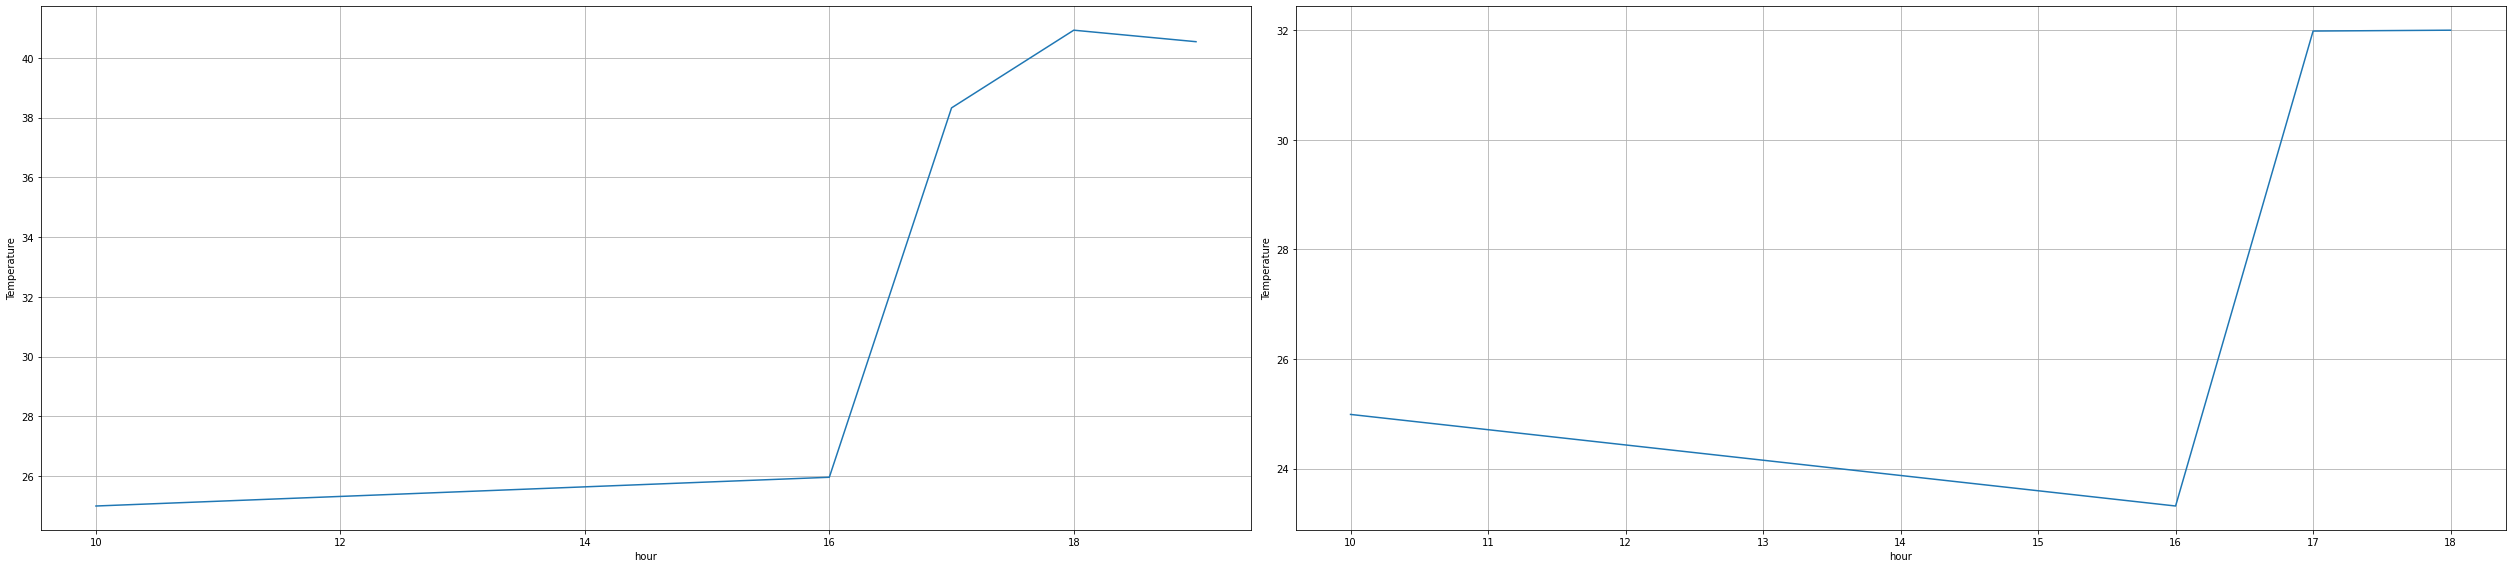

In [119]:
# how are the values distributed on hours?
fig,sub = plt.subplots(1,2,figsize=(35,8))
hour_count = cleaned[0].groupby("hour")["Temperature"].mean()
hour_count_ = cleaned[1].groupby("hour")["Temperature"].mean()

for feat, subplot in zip([hour_count, hour_count_],sub):
    sns.lineplot(x=feat.index, y=feat, ax=subplot,palette="Pastel1")
    subplot.grid()
fig.tight_layout()


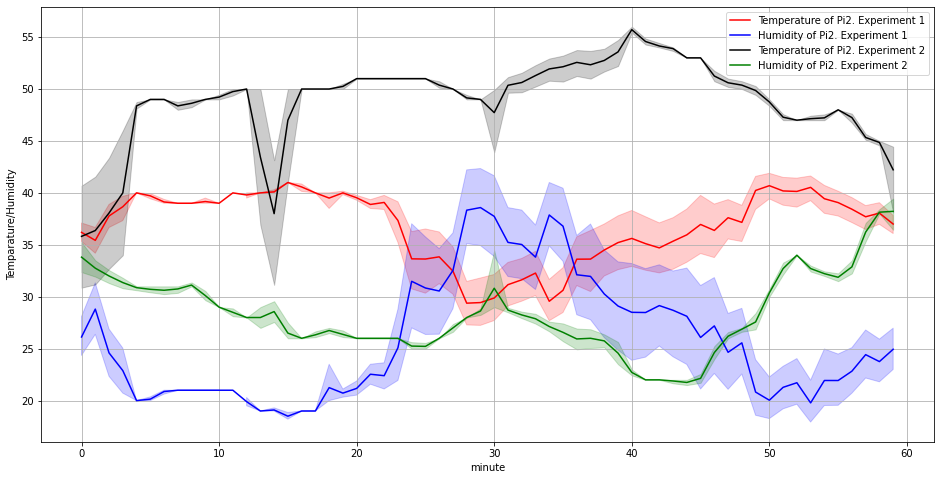

In [113]:
# Plot of Pi2 Experiment 1 and Experiment 2
fig, sub = plt.subplots(1,1,figsize=(16,8))
sub.set_ylabel('Temparature/Humidity')
sns.lineplot(x = cleaned[0]["minute"], y = cleaned[0]["Temperature"],ax = sub, color="red", label = "Temperature of Pi2. Experiment 1")
sns.lineplot(x = cleaned[0]["minute"], y = cleaned[0]["Humidity"],ax = sub, color="blue", label = "Humidity of Pi2. Experiment 1")
sns.lineplot(x = cleaned[4]["minute"], y = cleaned[4]["Temperature"],ax = sub, color="black", label = "Temperature of Pi2. Experiment 2")
sns.lineplot(x = cleaned[4]["minute"], y = cleaned[4]["Humidity"],ax = sub, color="green", label = "Humidity of Pi2. Experiment 2")
sub.grid()
sub.legend(loc="upper right")

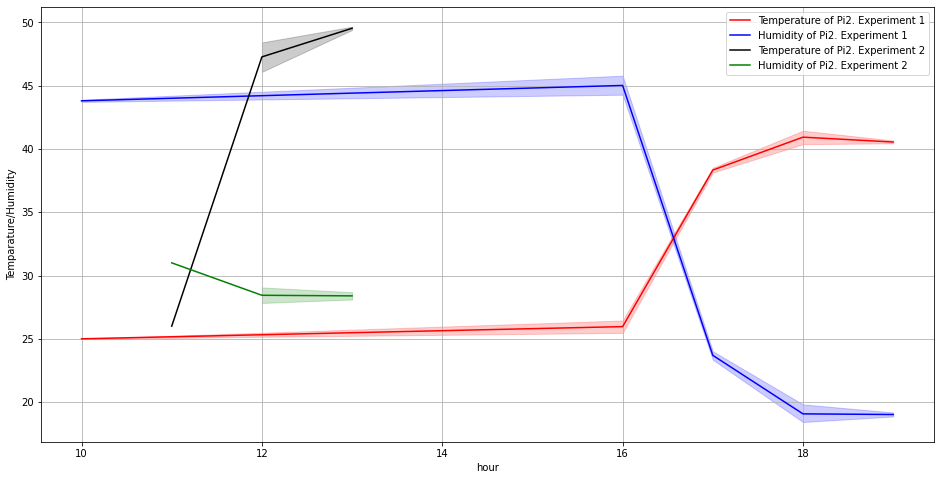

In [99]:
# Plot of Pi2 Experiment 1 and Experiment 2
fig, sub = plt.subplots(1,1,figsize=(16,8))
sub.set_ylabel('Temparature/Humidity')
sns.lineplot(x = cleaned[0]["hour"], y = cleaned[0]["Temperature"],ax = sub, color="red", label = "Temperature of Pi2. Experiment 1")
sns.lineplot(x = cleaned[0]["hour"], y = cleaned[0]["Humidity"],ax = sub, color="blue", label = "Humidity of Pi2. Experiment 1")
sns.lineplot(x = cleaned[4]["hour"], y = cleaned[4]["Temperature"],ax = sub, color="black", label = "Temperature of Pi2. Experiment 2")
sns.lineplot(x = cleaned[4]["hour"], y = cleaned[4]["Humidity"],ax = sub, color="green", label = "Humidity of Pi2. Experiment 2")
sub.grid()
sub.legend(loc="upper right")

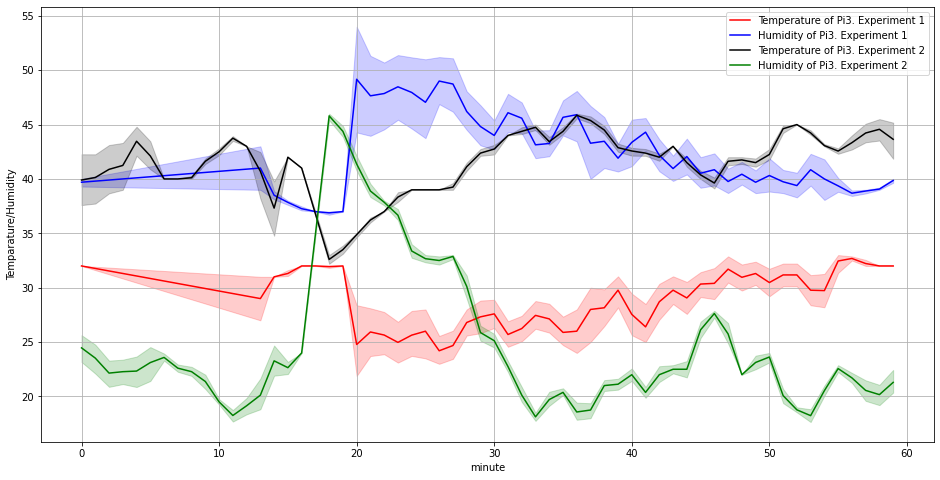

In [105]:
# Plot of Pi3 Experiment 1 and Experiment 2
fig, sub = plt.subplots(1,1,figsize=(16,8))
sub.set_ylabel('Temparature/Humidity')
sns.lineplot(x = cleaned[1]["minute"], y = cleaned[1]["Temperature"],ax = sub, color="red", label = "Temperature of Pi3. Experiment 1")
sns.lineplot(x = cleaned[1]["minute"], y = cleaned[1]["Humidity"],ax = sub, color="blue", label = "Humidity of Pi3. Experiment 1")
sns.lineplot(x = cleaned[5]["minute"], y = cleaned[5]["Temperature"],ax = sub, color="black", label = "Temperature of Pi3. Experiment 2")
sns.lineplot(x = cleaned[5]["minute"], y = cleaned[5]["Humidity"],ax = sub, color="green", label = "Humidity of Pi3. Experiment 2")
sub.grid()
sub.legend(loc="upper right")

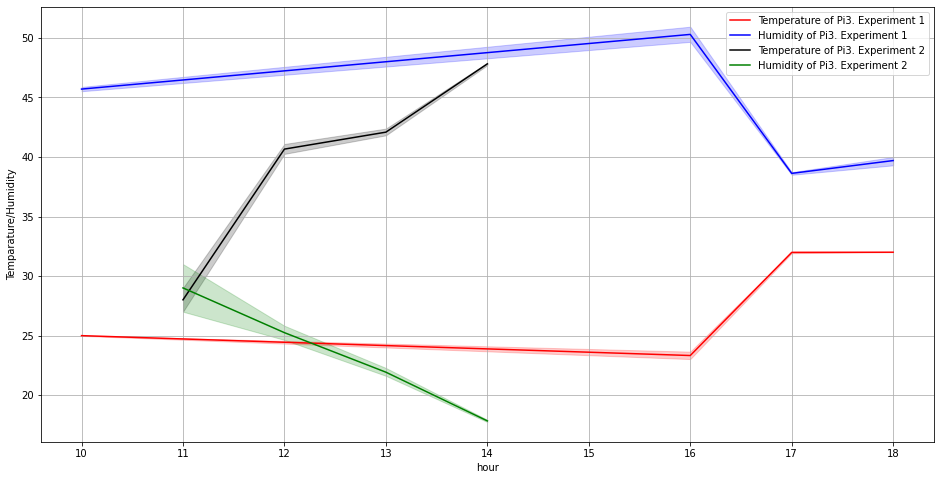

In [100]:
# Plot of Pi3 Experiment 1 and Experiment 2
fig, sub = plt.subplots(1,1,figsize=(16,8))
sub.set_ylabel('Temparature/Humidity')
sns.lineplot(x = cleaned[1]["hour"], y = cleaned[1]["Temperature"],ax = sub, color="red", label = "Temperature of Pi3. Experiment 1")
sns.lineplot(x = cleaned[1]["hour"], y = cleaned[1]["Humidity"],ax = sub, color="blue", label = "Humidity of Pi3. Experiment 1")
sns.lineplot(x = cleaned[5]["hour"], y = cleaned[5]["Temperature"],ax = sub, color="black", label = "Temperature of Pi3. Experiment 2")
sns.lineplot(x = cleaned[5]["hour"], y = cleaned[5]["Humidity"],ax = sub, color="green", label = "Humidity of Pi3. Experiment 2")
sub.grid()
sub.legend(loc="upper right")

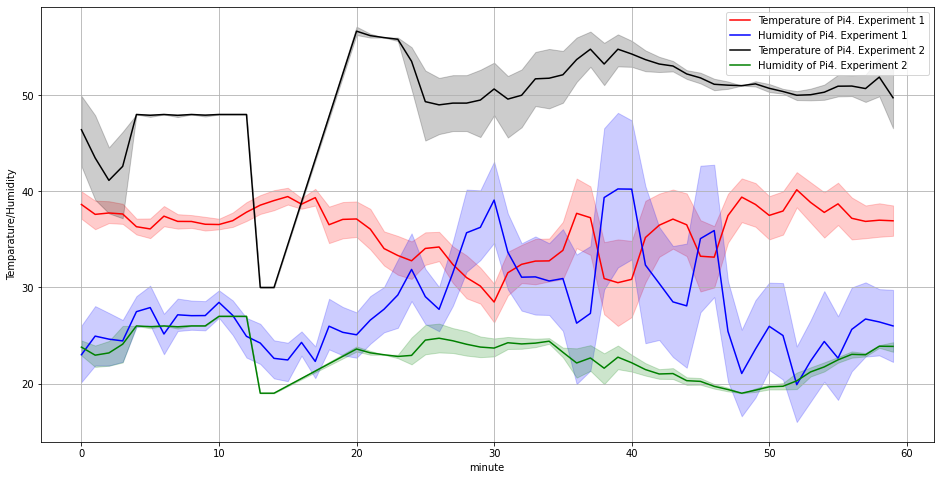

In [106]:
# Plot of Pi4 Experiment 1 and Experiment 2
fig, sub = plt.subplots(1,1,figsize=(16,8))
sub.set_ylabel('Temparature/Humidity')
sns.lineplot(x = cleaned[2]["minute"], y = cleaned[2]["Temperature"],ax = sub, color="red", label = "Temperature of Pi4. Experiment 1")
sns.lineplot(x = cleaned[2]["minute"], y = cleaned[2]["Humidity"],ax = sub, color="blue", label = "Humidity of Pi4. Experiment 1")
sns.lineplot(x = cleaned[6]["minute"], y = cleaned[6]["Temperature"],ax = sub, color="black", label = "Temperature of Pi4. Experiment 2")
sns.lineplot(x = cleaned[6]["minute"], y = cleaned[6]["Humidity"],ax = sub, color="green", label = "Humidity of Pi4. Experiment 2")
sub.grid()
sub.legend(loc="upper right")

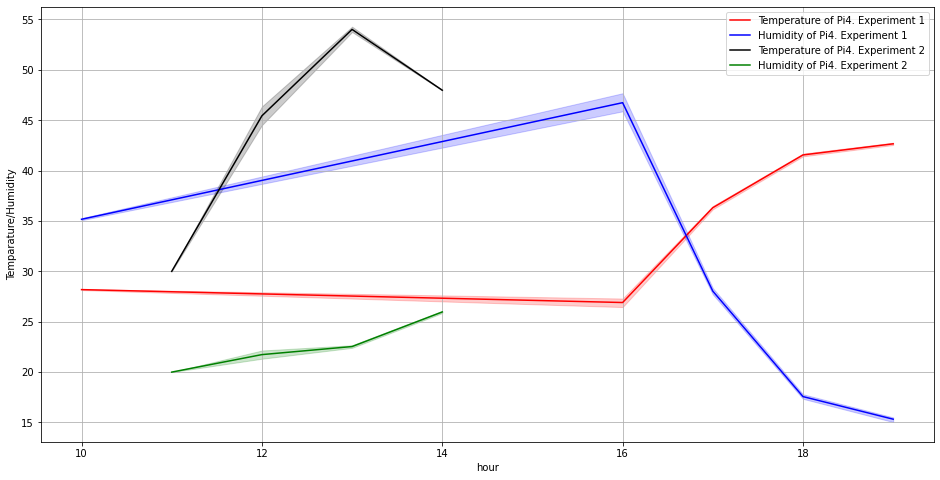

In [101]:
# Plot of Pi4 Experiment 1 and Experiment 2
fig, sub = plt.subplots(1,1,figsize=(16,8))
sub.set_ylabel('Temparature/Humidity')
sns.lineplot(x = cleaned[2]["hour"], y = cleaned[2]["Temperature"],ax = sub, color="red", label = "Temperature of Pi4. Experiment 1")
sns.lineplot(x = cleaned[2]["hour"], y = cleaned[2]["Humidity"],ax = sub, color="blue", label = "Humidity of Pi4. Experiment 1")
sns.lineplot(x = cleaned[6]["hour"], y = cleaned[6]["Temperature"],ax = sub, color="black", label = "Temperature of Pi4. Experiment 2")
sns.lineplot(x = cleaned[6]["hour"], y = cleaned[6]["Humidity"],ax = sub, color="green", label = "Humidity of Pi4. Experiment 2")
sub.grid()
sub.legend(loc="upper right")

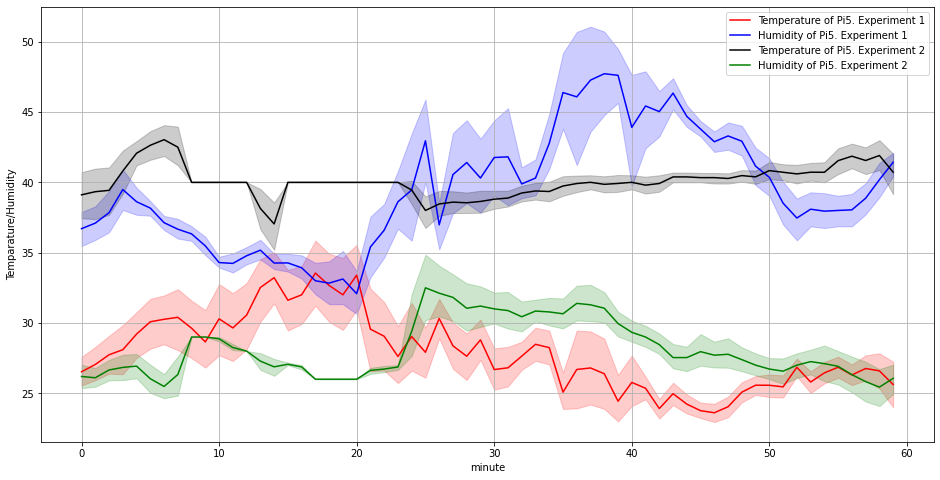

In [107]:
# Plot of Pi5 Experiment 1 and Experiment 2
fig, sub = plt.subplots(1,1,figsize=(16,8))
sub.set_ylabel('Temparature/Humidity')
sns.lineplot(x = cleaned[3]["minute"], y = cleaned[3]["Temperature"],ax = sub, color="red", label = "Temperature of Pi5. Experiment 1")
sns.lineplot(x = cleaned[3]["minute"], y = cleaned[3]["Humidity"],ax = sub, color="blue", label = "Humidity of Pi5. Experiment 1")
sns.lineplot(x = cleaned[7]["minute"], y = cleaned[7]["Temperature"],ax = sub, color="black", label = "Temperature of Pi5. Experiment 2")
sns.lineplot(x = cleaned[7]["minute"], y = cleaned[7]["Humidity"],ax = sub, color="green", label = "Humidity of Pi5. Experiment 2")
sub.grid()
sub.legend(loc="upper right")

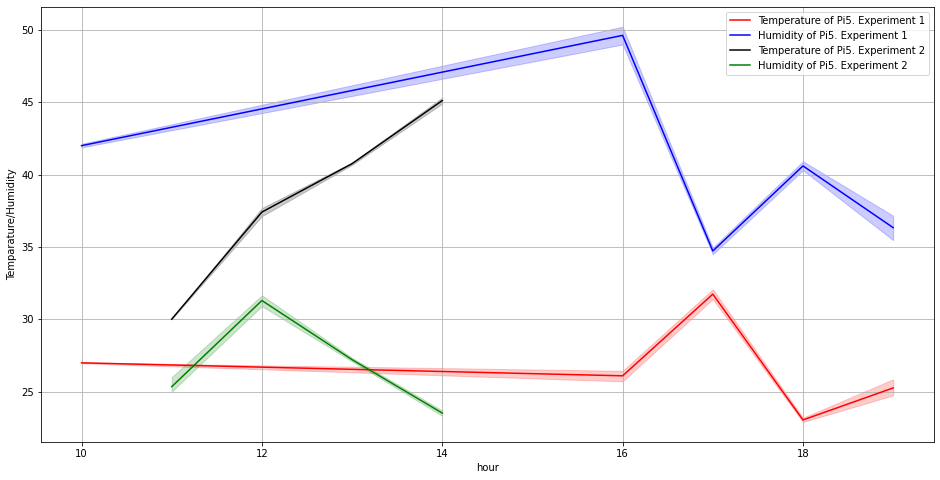

In [116]:
# Plot of Pi5 Experiment 1 and Experiment 2
fig, sub = plt.subplots(1,1,figsize=(16,8))
sub.set_ylabel('Temparature/Humidity')
sns.lineplot(x = cleaned[3]["hour"], y = cleaned[3]["Temperature"],ax = sub, color="red", label = "Temperature of Pi5. Experiment 1")
sns.lineplot(x = cleaned[3]["hour"], y = cleaned[3]["Humidity"],ax = sub, color="blue", label = "Humidity of Pi5. Experiment 1")
sns.lineplot(x = cleaned[7]["hour"], y = cleaned[7]["Temperature"],ax = sub, color="black", label = "Temperature of Pi5. Experiment 2")
sns.lineplot(x = cleaned[7]["hour"], y = cleaned[7]["Humidity"],ax = sub, color="green", label = "Humidity of Pi5. Experiment 2")
sub.grid()
sub.legend(loc="upper right")